<a href="https://colab.research.google.com/github/hiroki-tei/opencv-playground/blob/main/plays/contour/extract_vertices_coordinates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is this
This script analyzes shapes illustrated on an image file and detects the edges of the shapes.
Then, it detects the vertices of the edges and displays them with their coordinates.

# Sample

## before
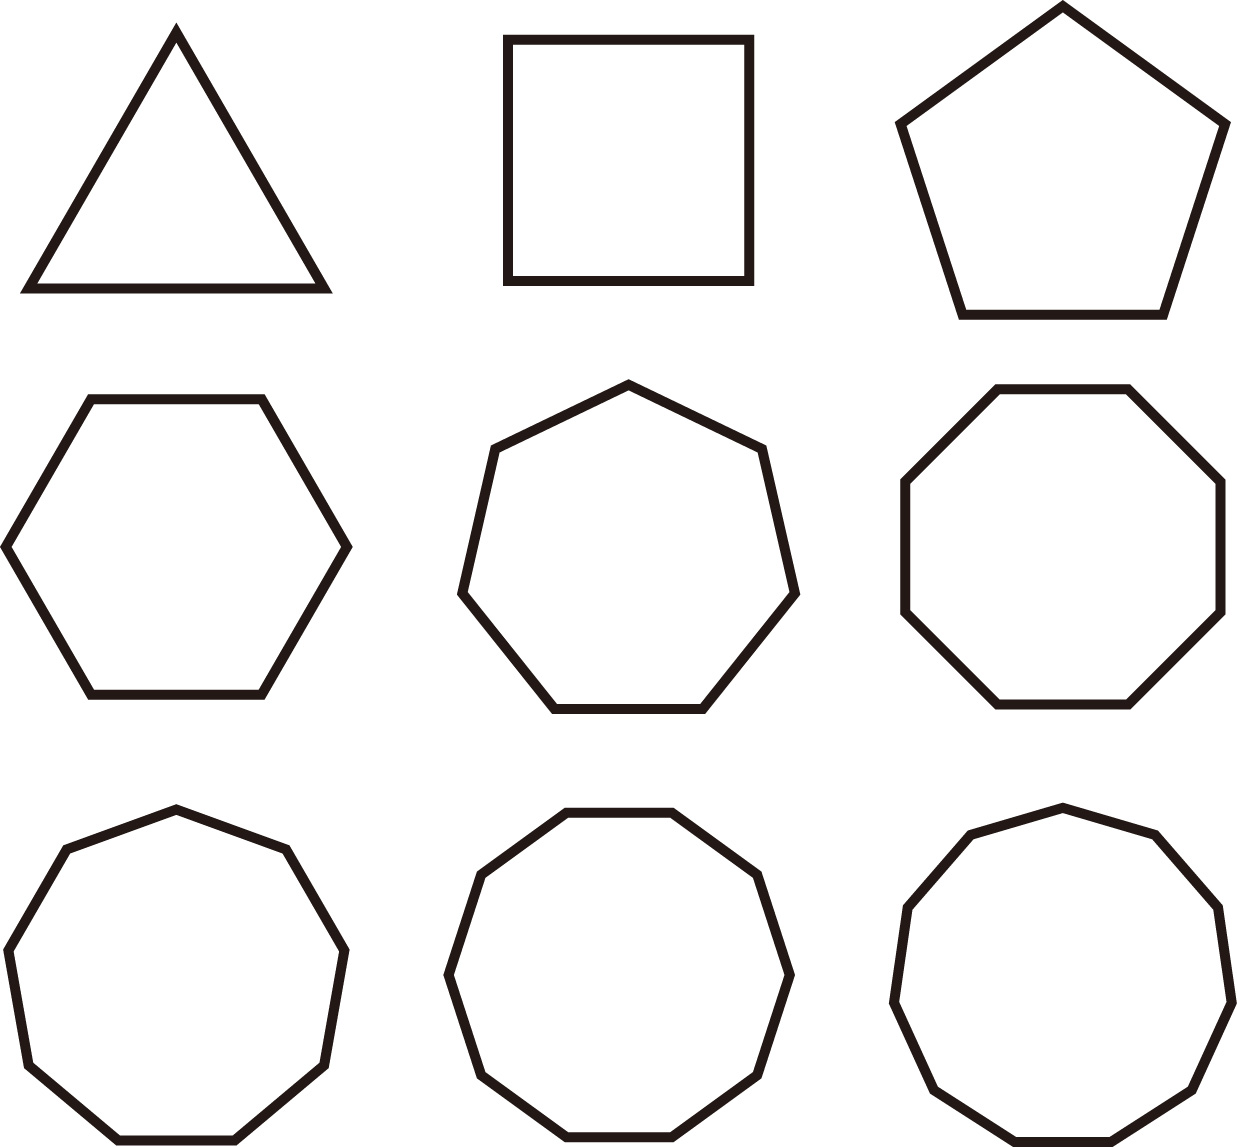

## after

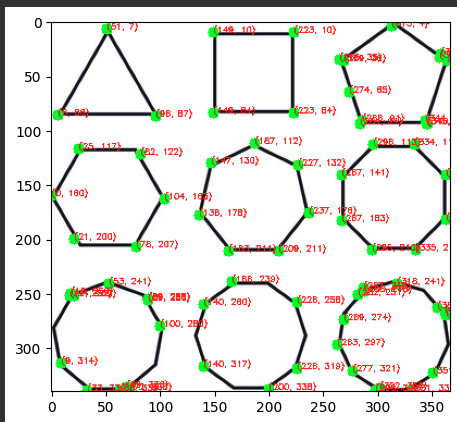

※ This sample is downloaded from folloing website

https://www.ac-illust.com/main/detail.php?id=24262698

# Setting

before executing this script, you should replace `image_url` variable with your image url

# Code

In [2]:
image_url = "https://exmple.com/image.jpg"

--2024-01-31 00:54:39--  https://thumb.ac-illust.com/28/28b4b086fd4c5a5d3ddc77924eefc956_t.jpeg
Resolving thumb.ac-illust.com (thumb.ac-illust.com)... 18.172.134.3, 18.172.134.7, 18.172.134.68, ...
Connecting to thumb.ac-illust.com (thumb.ac-illust.com)|18.172.134.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55928 (55K) [image/jpeg]
Saving to: ‘stuff.jpeg’

stuff.jpeg          100%[===================>]  54.62K  --.-KB/s    in 0.01s   

2024-01-31 00:54:39 (4.51 MB/s) - ‘stuff.jpeg’ saved [55928/55928]



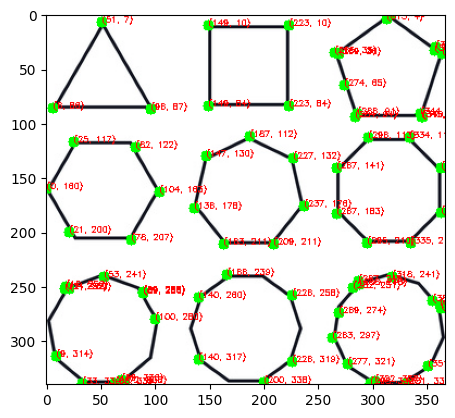

In [5]:
# prompt: ある画像をダウンロードし、OpenCVで輪郭を抽出する。輪郭の点数を削減後、頂点座標を取得する。最後に取得した座標を点で可視化し、座標を文字で表記する

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# 画像のダウンロード
!wget -O stuff.jpeg $image_url

# 画像の読み込み
image = cv2.imread('stuff.jpeg')

# グレースケール変換
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny法によるエッジ検出
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# 輪郭の抽出
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cts = []
# 輪郭の点数を削減
for i, contour in enumerate(contours):

    cts.append(cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True))

# 頂点座標の取得
vertices = []
for contour in cts:
    for point in contour:
        vertices.append(tuple(point[0]))

# 座標の可視化
for vertex in vertices:
    cv2.circle(image, vertex, 5, (0, 255, 0), -1)

# 座標の文字表記
for i, vertex in enumerate(vertices):
    cv2.putText(image, f"{vertex}", vertex, cv2.FONT_HERSHEY_SIMPLEX, 0.25, (255, 0, 0), 1)

# 画像の表示
plt.imshow(image)
plt.show()
